  Student_ID  Gender  Study_Hours_per_Week  Attendance_Rate  Past_Exam_Scores  \
0       S147    Male                    31        68.267841                86   
1       S136    Male                    16        78.222927                73   
2       S209  Female                    21        87.525096                74   
3       S458  Female                    27        92.076483                99   
4       S078  Female                    37        98.655517                63   

  Parental_Education_Level Internet_Access_at_Home Extracurricular_Activities  \
0              High School                     Yes                        Yes   
1                      PhD                      No                         No   
2                      PhD                     Yes                         No   
3                Bachelors                      No                         No   
4                  Masters                      No                        Yes   

   Final_Exam_Score Pass_F

C:\Users\Hassan Laptop Point\anaconda4\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,009 (74.25 KB)

 Trainable params: 19,009 (74.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - loss: 3245.3806 - mae: 56.5896 - val_loss: 3173.6614 - val_mae: 56.0693
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3226.6023 - mae: 56.4223 - val_loss: 3149.0112 - val_mae: 55.8476
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3186.3394 - mae: 56.0595 - val_loss: 3078.5725 - val_mae: 55.2038
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3038.3501 - mae: 54.6941 - val_loss: 2781.6753 - val_mae: 52.4175
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2535.7874 - mae: 49.8226 - val_loss: 2074.6226 - val_mae: 45.1955
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1841.5092 - mae: 42.2832 - val_loss: 1480.3042 - val_mae: 38.0837
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1326.3037 - mae: 35.7783 - val_loss: 1056.7571 - val_mae: 32.0431
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 937.5563 - mae: 29.8617 - val_loss: 718.8331 - val_mae: 26.2460
Ep

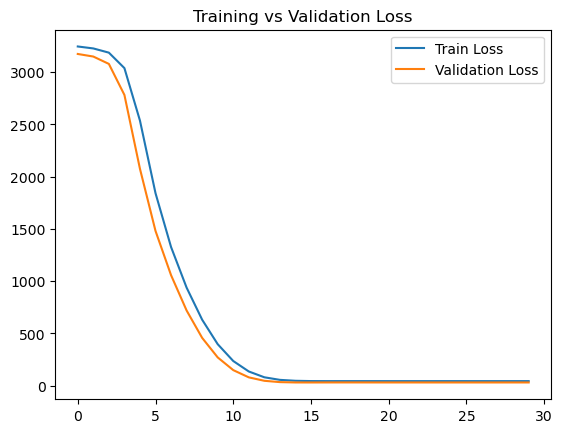

In [1]:
# Week 10 - Advanced Deep Learning (RNN for CSV dataset)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error

# -------------------------------
# 1. Load Dataset
# -------------------------------
df = pd.read_csv("student_performance_dataset_cleaned.csv")
print(df.head())

# -------------------------------
# 2. Select features and target
# -------------------------------

target = "Final_Exam_Score"      # change if needed
X = df.drop(columns=[target])
y = df[target]

# Encode object columns
for col in X.select_dtypes(include="object").columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Convert to numpy
X = X.values
y = y.values

# -------------------------------
# 3. Scaling
# -------------------------------
scaler = StandardScaler()
X = scaler.fit_transform(X)

# -------------------------------
# 4. Reshape to RNN format
# -------------------------------
# RNN expects (samples, timesteps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# -------------------------------
# 5. Train-test split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------------
# 6. Build LSTM Model
# -------------------------------
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], 1)),
    Dense(32, activation='relu'),
    Dense(1)   # regression output
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

# -------------------------------
# 7. Train
# -------------------------------
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    verbose=1
)

# -------------------------------
# 8. Evaluate
# -------------------------------
y_pred = model.predict(X_test).flatten()

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\nEvaluation Results:")
print("MAE:", mae)
print("RMSE:", rmse)

# -------------------------------
# 9. Plot Loss
# -------------------------------
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()
